## Simulation

In [150]:
%load_ext autoreload
%autoreload 2

from entities.simulation import Simulation

"""
The car spawn policy determines the directions in which cars 
will spawn and the duration for which they will spawn in that direction.
"""
spawning_rules = [
     ('all_directions', 300),      # 5 minutes    
     ('no_cars', 60),              # 1 minute  
     ('up_down', 120),             # 2 minutes
     ('left_right', 120),          # 2 minutes
     ('all_directions', 300)       # 5 minutes 
]

simulation = Simulation(
     cars_per_second=1,  
     spawning_rules=spawning_rules
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Simulation duration: 900 seconds


In [151]:
simulation.run('ft', save_stas=True)

In [152]:
simulation.run('pi', save_stas=True)

In [153]:
simulation.run('vi', save_stas=True)

## Load data

In [155]:
import pandas as pd

# Load the cumulative waiting times from the csv files
cumulative_waiting_times_pi = pd.read_csv('data/cumulative_waitingtimes_pi.csv', index_col=0, names=['cumulative_waiting_time'])
cumulative_waiting_times_ft = pd.read_csv('data/cumulative_waitingtimes_ft.csv', index_col=0, names=['cumulative_waiting_time'])

# Load the number of stopped cars
n_stopped_cars_pi = pd.read_csv('data/stopped_cars_pi.csv', index_col=0, names=['stopped_cars'])['stopped_cars']
n_stopped_cars_ft = pd.read_csv('data/stopped_cars_ft.csv', index_col=0, names=['stopped_cars'])['stopped_cars']

## Plot results

In [156]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.style.use('seaborn-v0_8-pastel')

In [157]:
plot_green = "#6BC8A3"
plot_yellow = "#FFD84C"
plot_red = "#FF8B60"

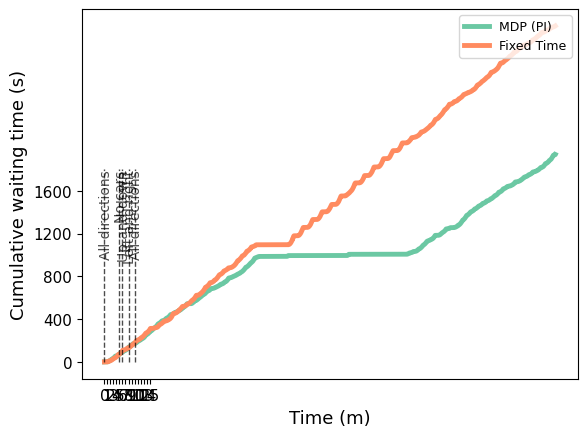

In [159]:
## The Fixed Time agent makes people arrive late!

plt.plot(range(len(cumulative_waiting_times_pi)), cumulative_waiting_times_pi, label='MDP (PI)', color=plot_green, linewidth=3.5)
plt.plot(range(len(cumulative_waiting_times_ft)), cumulative_waiting_times_ft, label='Fixed Time', color=plot_red, linewidth=3.5)

plt.xlabel('Time (m)', fontsize=13)
plt.ylabel('Cumulative waiting time (s)', fontsize=13)

ax = plt.gca()
ax.set_yticks([0, 400, 800, 1200, 1600])
ax.set_xticks([0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900])

ax.set_xticklabels([f'{int(x)//60}' for x in ax.get_xticks()], fontsize=11)
ax.set_yticklabels([f'{y}' for y in ax.get_yticks()], fontsize=11)

plt.vlines(0, 0, 1800, color='black', linestyle='--', alpha=0.7, linewidth=1)
plt.text(25, 1800, 'All directions', fontsize=10, color='black', alpha=0.7, rotation=90, verticalalignment='top', horizontalalignment='center')
plt.vlines(300, 0, 1800, color='black', linestyle='--', alpha=0.7, linewidth=1)
plt.text(325, 1800, 'No cars', fontsize=10, color='black', alpha=0.7, rotation=90, verticalalignment='top', horizontalalignment='center')
plt.vlines(360, 0, 1800, color='black', linestyle='--', alpha=0.7, linewidth=1)
plt.text(385, 1800, 'Up and down', fontsize=10, color='black', alpha=0.7, rotation=90, verticalalignment='top', horizontalalignment='center')
plt.vlines(480, 0, 1800, color='black', linestyle='--', alpha=0.7, linewidth=1)
plt.text(505, 1800, 'Left and right', fontsize=10, color='black', alpha=0.7, rotation=90, verticalalignment='top', horizontalalignment='center')
plt.vlines(600, 0, 1800, color='black', linestyle='--', alpha=0.7, linewidth=1)
plt.text(625, 1800, 'All directions', fontsize=10, color='black', alpha=0.7, rotation=90, verticalalignment='top', horizontalalignment='center')

plt.legend(prop={'size': 9}, loc='upper right')

plt.show()

C:\Users\sandr\AppData\Local\Temp\ipykernel_20016\2861274776.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Fixed Time', 'MDP (PI)'], fontsize=11)


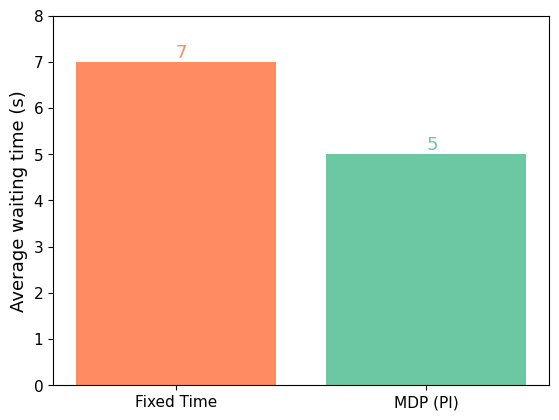

In [189]:
# Stick plot of average waiting times
plt.bar(['Fixed Time', 'MDP (PI)'], 
        [cumulative_waiting_times_ft['cumulative_waiting_time'].tail(1).values[0]//n_stopped_cars_ft.values[0], cumulative_waiting_times_mdp['cumulative_waiting_time'].tail(1).values[0]//n_stopped_cars_mdp.values[0]],
        color=[plot_red, plot_green])

plt.ylabel('Average waiting time (s)', fontsize=13)
ax = plt.gca()
ax.set_xticklabels(['Fixed Time', 'MDP (PI)'], fontsize=11)
ax.set_yticks(range(0, 9))
ax.set_yticklabels([f'{y}' for y in range(0, 9)], fontsize=11)  

plt.text(0, cumulative_waiting_times_ft['cumulative_waiting_time'].tail(1).values[0]//n_stopped_cars_ft.values[0] + 0.1, f'{cumulative_waiting_times_ft["cumulative_waiting_time"].tail(1).values[0]//n_stopped_cars_ft.values[0]}', fontsize=13, color=plot_red)
plt.text(1, cumulative_waiting_times_mdp['cumulative_waiting_time'].tail(1).values[0]//n_stopped_cars_mdp.values[0] + 0.1, f'{cumulative_waiting_times_mdp["cumulative_waiting_time"].tail(1).values[0]//n_stopped_cars_mdp.values[0]}', fontsize=13, color=plot_green)

plt.show()

## TODO - Queue lengths plots

In [78]:
# Load queue lengths
queue_lengths_mdp = pd.read_csv('data/queue_lengths_mdp.csv', index_col=0, names=['queue_length']).reset_index()
queue_lengths_ft = pd.read_csv('data/queue_lengths_ft.csv', index_col=0, names=['queue_length']).reset_index()

In [80]:
queue_lengths_mdp['queue_length'].tail(1).values[0]

1

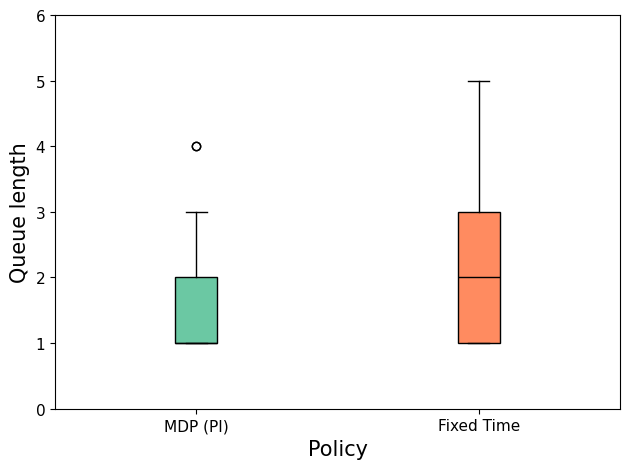

In [115]:
# Plot 2 boxplots of queue lengths
data = [queue_lengths_mdp['queue_length'], queue_lengths_ft['queue_length']]
colors = [plot_green, plot_red]
labels = ['MDP (PI)', 'Fixed Time']
ax = plt.gca()
bplot = ax.boxplot(data,
            patch_artist=True,
            medianprops=dict(color='black'),
            )

ax.set_xticklabels(labels, fontsize=11)
ax.set_yticks([0, 1, 2, 3, 4, 5, 6])
ax.set_yticklabels([f'{y}' for y in range(0, 7)], fontsize=11)

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Queue length', fontsize=15)
plt.xlabel('Policy', fontsize=15)

plt.tight_layout()

MDP rarely has a queue length of 4 or more. Fixed time has longer queues instead.

C:\Users\sandr\AppData\Local\Temp\ipykernel_20016\864064908.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Fixed Time', 'MDP (PI)'], fontsize=11)


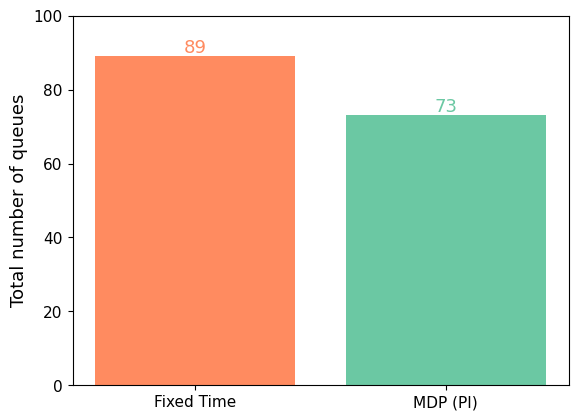

In [185]:
# Barplot of total number of queues
plt.bar(['Fixed Time', 'MDP (PI)'], 
        [len(queue_lengths_ft['queue_length']), len(queue_lengths_mdp['queue_length'])],
        color=[plot_red, plot_green])

plt.ylabel('Total number of queues', fontsize=13)

ax = plt.gca()

ax.set_xticklabels(['Fixed Time', 'MDP (PI)'], fontsize=11)

ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_yticklabels([f'{int(y)}' for y in ax.get_yticks()], fontsize=11)

plt.text(0, len(queue_lengths_ft['queue_length'])+1, f'{len(queue_lengths_ft["queue_length"])}', fontsize=13, color=plot_red, horizontalalignment='center')
plt.text(1, len(queue_lengths_mdp['queue_length'])+1, f'{len(queue_lengths_mdp["queue_length"])}', fontsize=13, color=plot_green, horizontalalignment='center')

plt.show()

C:\Users\sandr\AppData\Local\Temp\ipykernel_20016\3156431930.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Fixed Time', 'MDP (PI)'], fontsize=11)


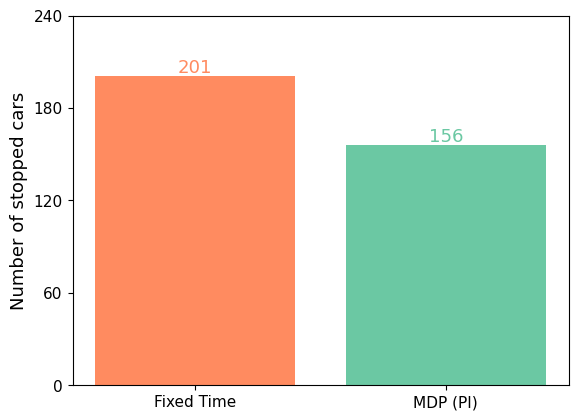

In [194]:
# Barplot of number of stopped cars

plt.bar(['Fixed Time', 'MDP (PI)'],
        [n_stopped_cars_ft.values[0], n_stopped_cars_mdp.values[0]],
        color=[plot_red, plot_green])

plt.ylabel('Number of stopped cars', fontsize=13)

ax = plt.gca()

ax.set_xticklabels(['Fixed Time', 'MDP (PI)'], fontsize=11)

ax.set_yticks([0, 60, 120, 180, 240])

ax.set_yticklabels([f'{int(y)}' for y in ax.get_yticks()], fontsize=11)

plt.text(0, n_stopped_cars_ft.values[0]+2, f'{n_stopped_cars_ft.values[0]}', fontsize=13, color=plot_red, horizontalalignment='center')
plt.text(1, n_stopped_cars_mdp.values[0]+2, f'{n_stopped_cars_mdp.values[0]}', fontsize=13, color=plot_green, horizontalalignment='center')

plt.show()